In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *

In [2]:
df = pd.read_csv("diabetes_dataset.csv")
df

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,46,Male,Other,Graduate,Upper-Middle,Unemployed,Former,1,136,8.3,...,45,150,116,113,109,14.58,5.55,26.0,Pre-Diabetes,0
99996,41,Female,White,Graduate,Middle,Employed,Never,3,76,8.8,...,55,123,146,96,146,9.02,5.97,24.4,Pre-Diabetes,0
99997,57,Female,Black,No formal,Upper-Middle,Employed,Former,4,121,9.9,...,50,111,184,93,132,2.57,5.21,27.6,No Diabetes,0
99998,47,Female,Black,Highschool,Lower-Middle,Retired,Never,3,52,5.9,...,68,91,116,106,117,9.81,5.53,26.4,Pre-Diabetes,0


In [3]:
df.columns

Index(['age', 'gender', 'ethnicity', 'education_level', 'income_level',
       'employment_status', 'smoking_status', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'bmi', 'waist_to_hip_ratio', 'systolic_bp',
       'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol',
       'ldl_cholesterol', 'triglycerides', 'glucose_fasting',
       'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score',
       'diabetes_stage', 'diagnosed_diabetes'],
      dtype='object')

In [4]:
df.head(5)

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


In [5]:
for col in df.columns.to_list():
    num_nans = df[col].isna().sum()
    if num_nans != 0:
        print(f"'{col}' has {num_nans} NaNs.")

In [6]:
df["diabetes_stage"].value_counts()

diabetes_stage
Type 2          59774
Pre-Diabetes    31845
No Diabetes      7981
Gestational       278
Type 1            122
Name: count, dtype: int64

In [7]:
# dropping columns that I am not interested in investigating
# they may be interesting for a societal viewpoint, however, in the context of this project
# I wish they not be considered
cols_to_drop = ['education_level', 'employment_status', 'income_level']
df = df.drop(columns=cols_to_drop)

In [8]:
numeric_cols = df.select_dtypes(include='number').columns
numeric_cols

Index(['age', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'bmi', 'waist_to_hip_ratio', 'systolic_bp',
       'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol',
       'ldl_cholesterol', 'triglycerides', 'glucose_fasting',
       'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score',
       'diagnosed_diabetes'],
      dtype='object')

<Axes: >

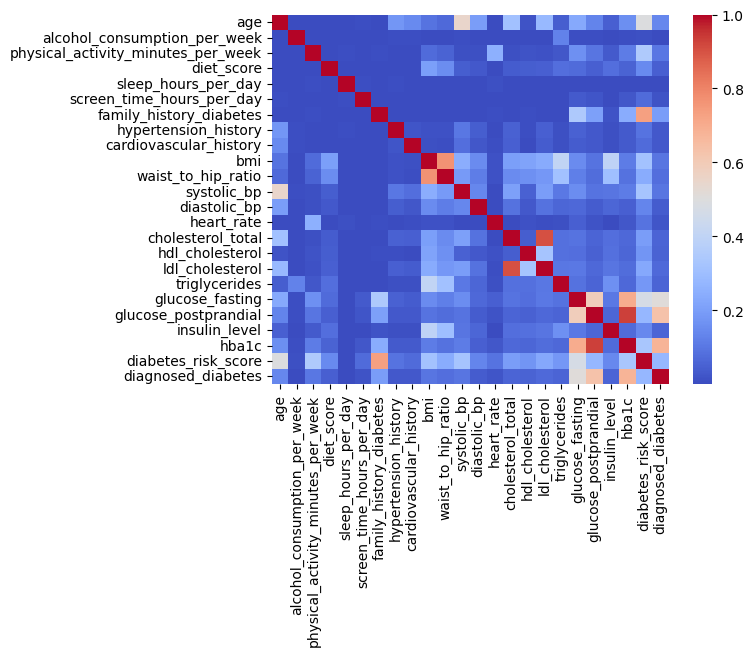

In [9]:
df_numerical = df[numeric_cols]
corr_matrix = df_numerical.corr().abs()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)


In [10]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_cols = [col for col in upper.columns if any(upper[col] > 0.7)]
print("Columns highly correlated with others:")
print(high_corr_cols)

Columns highly correlated with others:
['waist_to_hip_ratio', 'ldl_cholesterol', 'hba1c', 'diabetes_risk_score']


In [11]:
more_cols_to_drop = ['waist_to_hip_ratio', 'ldl_cholesterol', 'hdl_cholesterol', 'hba1c', 'diabetes_risk_score', 'smoking_status']
df = df.drop(columns=more_cols_to_drop)


<Axes: >

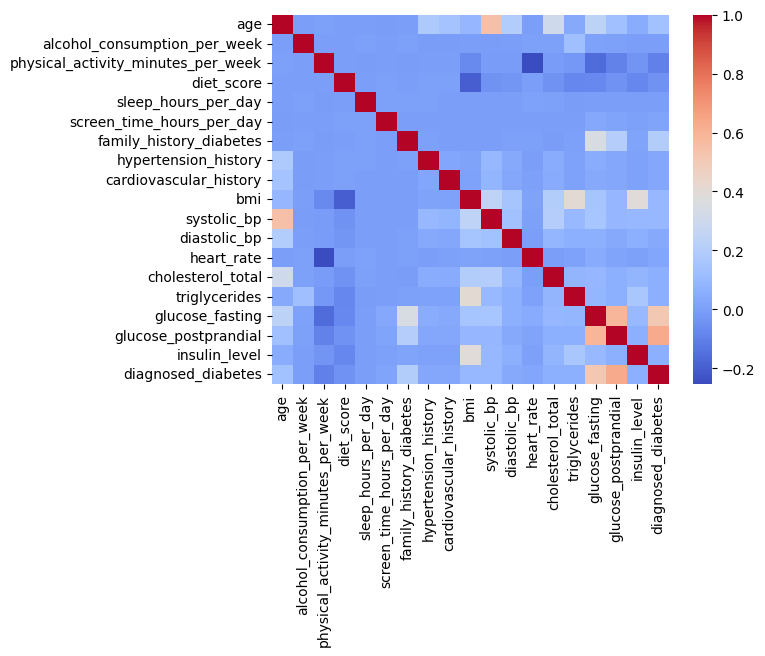

In [12]:
sns.heatmap(df[df.select_dtypes(include='number').columns].corr(), cmap='coolwarm')

In [13]:
def scatter_plot_value_color_coded(value: str, color_by: str):
    return sns.scatterplot(data = df, x = "User ID", y = value, hue = color_by, s = 25)

In [14]:
def plot_color_coded(value: str, color_by: str):
    scatter_plot_value_color_coded(value, color_by)
    plt.legend(
        title='Group',
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        borderaxespad=0
    )
    plt.show()

In [15]:
cat_cols = df.select_dtypes(exclude='number').columns
df[cat_cols]

,gender,ethnicity,diabetes_stage
0,Male,Asian,Type 2
1,Female,White,No Diabetes
2,Male,Hispanic,Type 2
3,Female,Black,Type 2
4,Male,White,Type 2
...,...,...,...
99995,Male,Other,Pre-Diabetes
99996,Female,White,Pre-Diabetes
99997,Female,Black,No Diabetes
99998,Female,Black,Pre-Diabetes


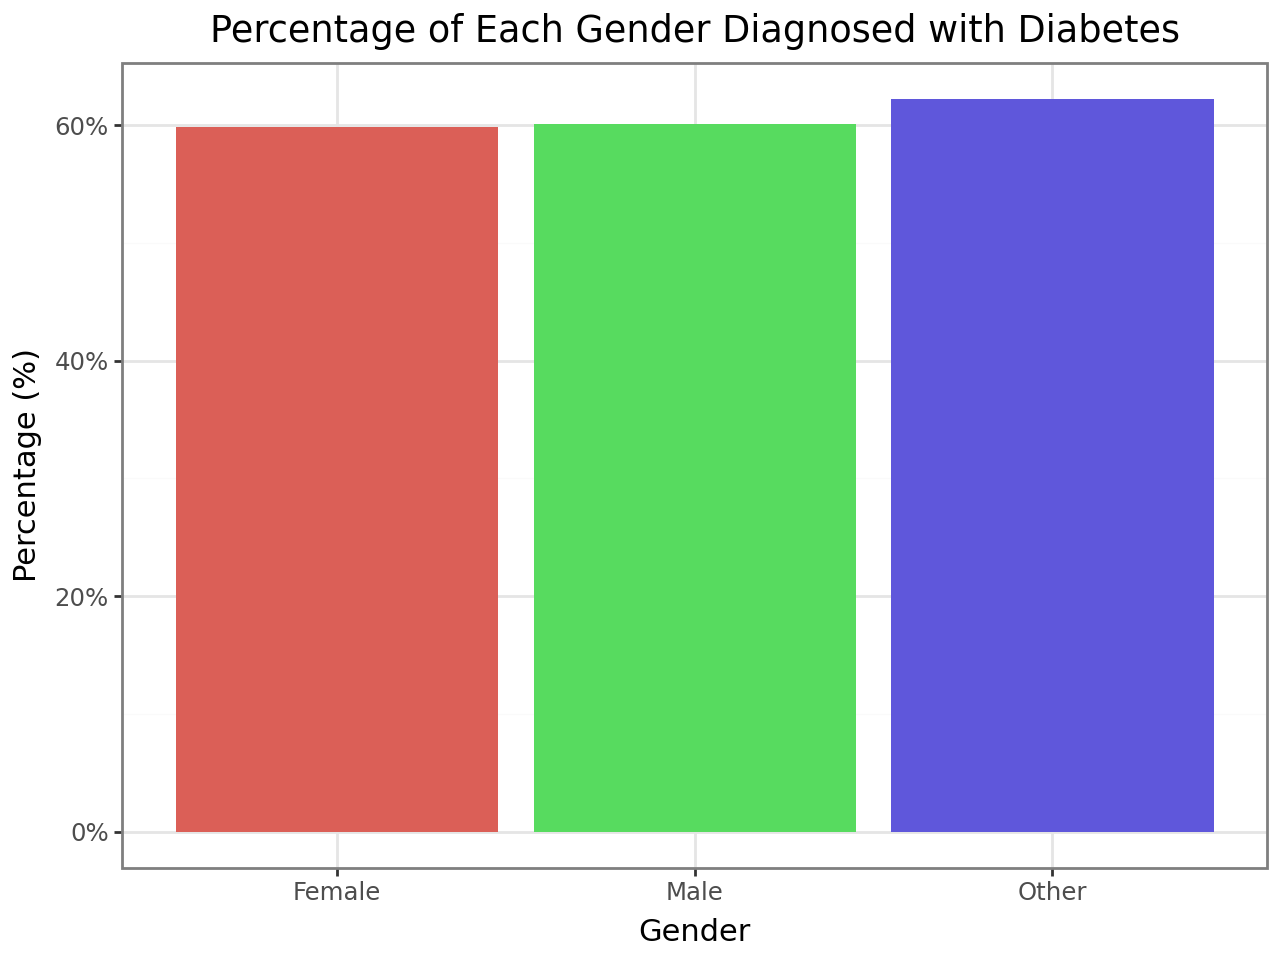

In [16]:
gender_diabetes = (
    df.groupby('gender')['diagnosed_diabetes']
      .mean()
      .reset_index()
)

gender_diabetes['diagnosed_percent'] = gender_diabetes['diagnosed_diabetes'] * 100

(
    ggplot(gender_diabetes, aes(x='gender', y='diagnosed_percent', fill='gender')) +
    geom_col(show_legend=False) +
    labs(
        title='Percentage of Each Gender Diagnosed with Diabetes',
        x='Gender',
        y='Percentage (%)'
    ) +
    scale_y_continuous(labels=lambda l: [f'{v:.0f}%' for v in l]) +
    theme_bw()
)

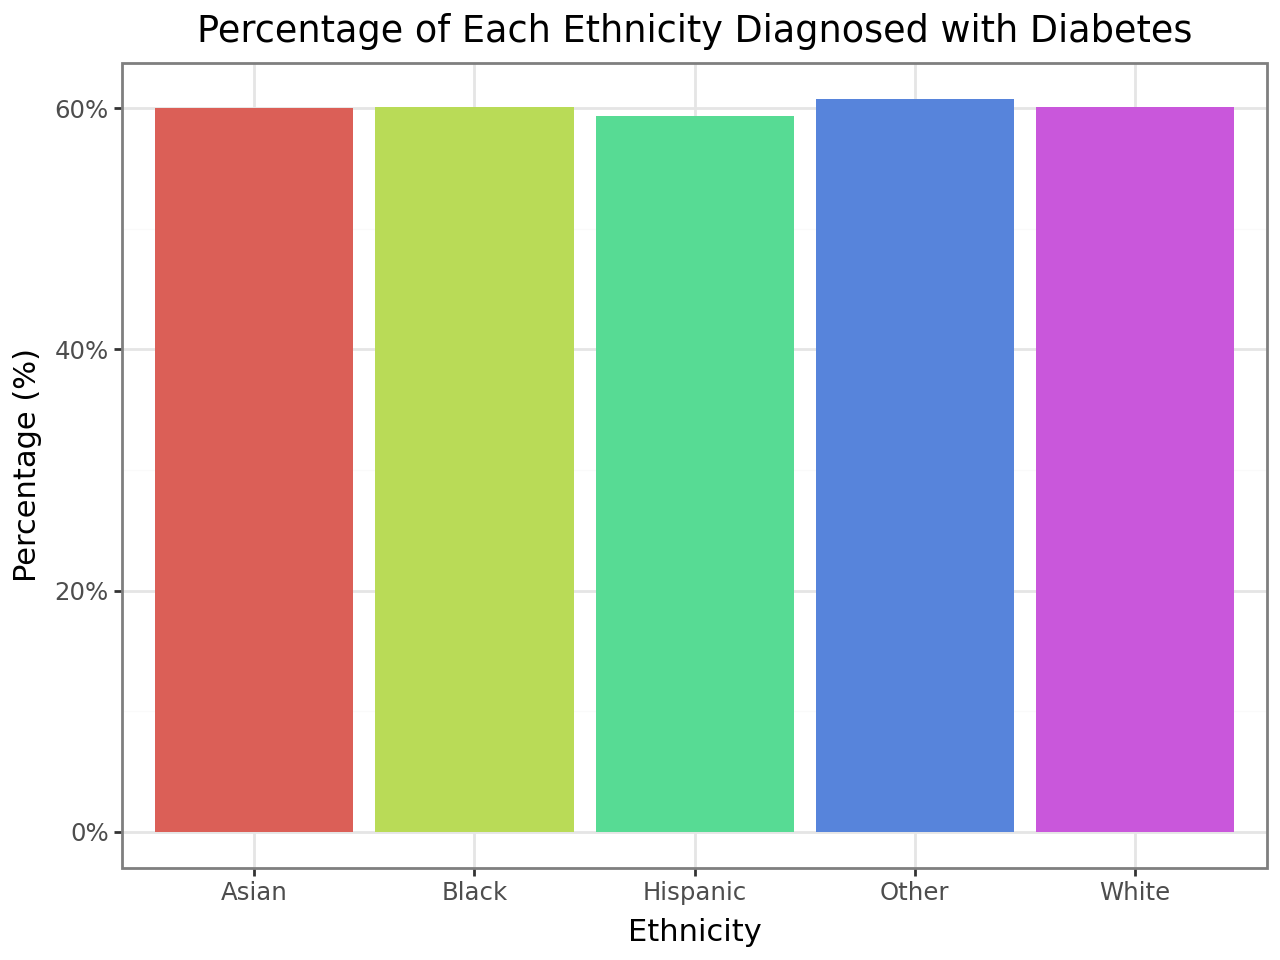

In [19]:
ethnicity_diabetes = (
    df.groupby('ethnicity')['diagnosed_diabetes']
      .mean()
      .reset_index()
)

ethnicity_diabetes['diagnosed_percent'] = ethnicity_diabetes['diagnosed_diabetes'] * 100

(
    ggplot(ethnicity_diabetes, aes(x='ethnicity', y='diagnosed_percent', fill='ethnicity')) +
    geom_col(show_legend=False) +
    labs(
        title='Percentage of Each Ethnicity Diagnosed with Diabetes',
        x='Ethnicity',
        y='Percentage (%)'
    ) +
    scale_y_continuous(labels=lambda l: [f'{v:.0f}%' for v in l]) +
    theme_bw()
)